In [1]:
from rgb_blending import build_b64_png, seismic_blend_png, line_blend_png, slice_sgy, build_synth, ricker_expansion, clip_and_normalize
from las_to_spec import las_to_spec, rgb_log
import numpy
import matplotlib.pyplot as plt
from IPython.display import Image

frequencies = (15,25,35)

%matplotlib inline

/home/gijsbertbas/Projects/SpecDec/f3sub_hack_cwt_cube_well_f03-03.npy
/home/gijsbertbas/Projects/SpecDec/F03_Subcrop.sgy


In [2]:
path = '../../rgb-explorers/logs/'
logfile = 'F03-03_F03-03_Set.las'

In [3]:
#blendarray = rgb_log(path+logfile, frequencies)

In [4]:
#Image(build_synth(blendarray))

In [5]:
line = slice_sgy('x',400)
line.shape[0]

254

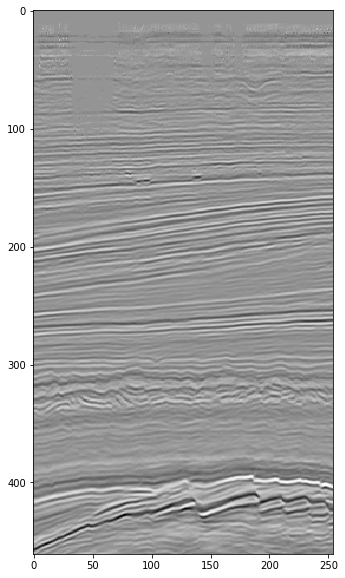

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(line.T, cmap=plt.get_cmap('Greys'))

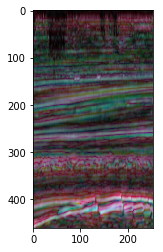

In [11]:
img = line_blend_png('x',400,frequencies,250)

In [13]:
size(img)

NameError: name 'size' is not defined

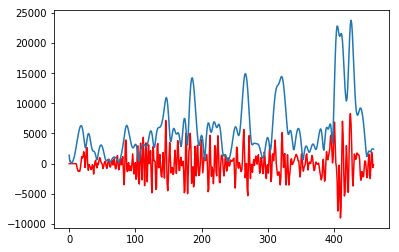

In [145]:
import bruges
from scipy.signal import hilbert


trace = line[100,:]
w = bruges.filters.ricker(f=20, duration=0.512, dt=0.004)
bandpass = numpy.squeeze(numpy.convolve(w, trace, mode='same'))
expansion = numpy.abs(hilbert(bandpass))

plt.figure()
plt.plot(trace, 'r')
plt.plot(expansion)

In [164]:
frequencies = (20,25,35)

shape = line.shape
slices = []
blend_line = numpy.zeros((*line.shape, 3))
for x in range(0, shape[0]):
    trace = line[x,:]
    E = ricker_expansion(trace, frequencies)
    blend_line[x, :, :] = E

In [165]:
blend_line=c_n(blend_line)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


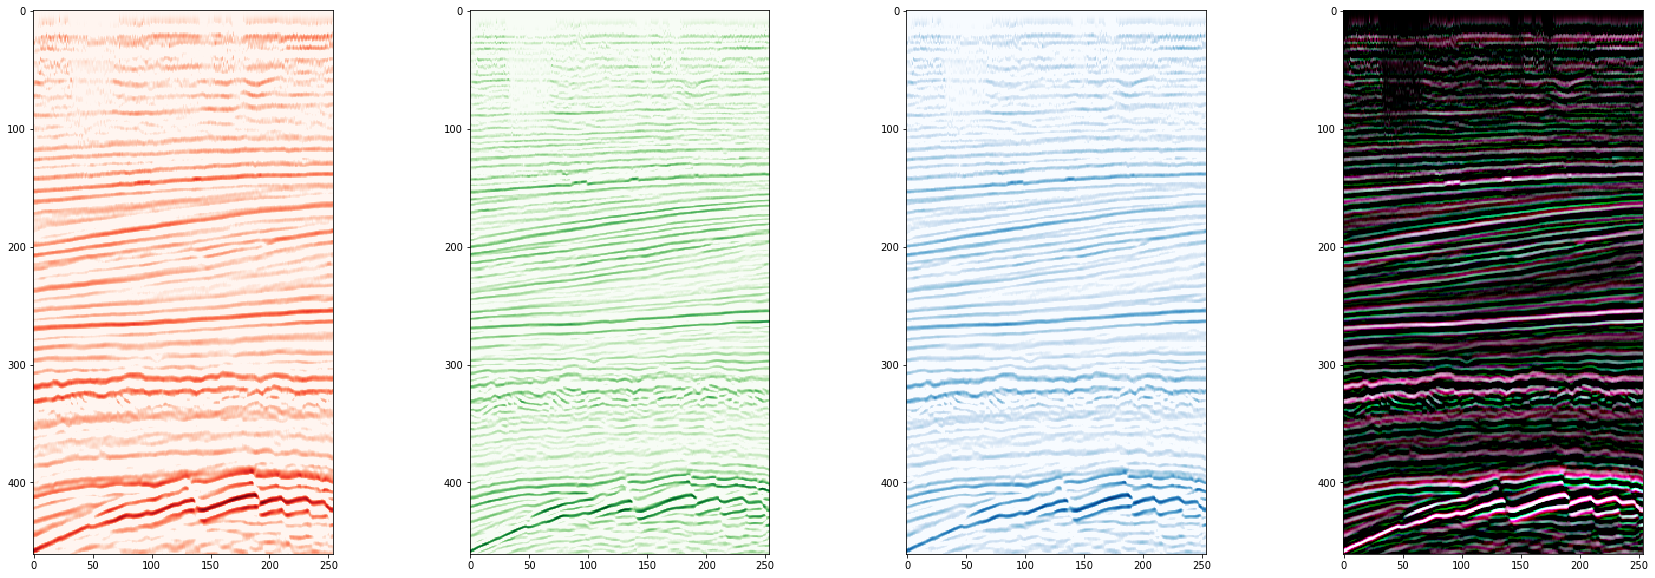

In [166]:
blend_line = numpy.flip(blend_line,axis=2)
fig,axes = plt.subplots(1,4,figsize=(30,10))
axes[0].imshow(blend_line[:,:,0].T, cmap=plt.get_cmap('Reds'))
axes[1].imshow(blend_line[:,:,1].T, cmap=plt.get_cmap('Greens'))
axes[2].imshow(blend_line[:,:,2].T, cmap=plt.get_cmap('Blues'))
axes[3].imshow(numpy.swapaxes(blend_line,0,1))

In [98]:
#Image(line_blend_png('y',319,frequencies))

In [3]:
logarray = las_to_spec(path+logfile)

Header section Parameter regexp=~P was not found.


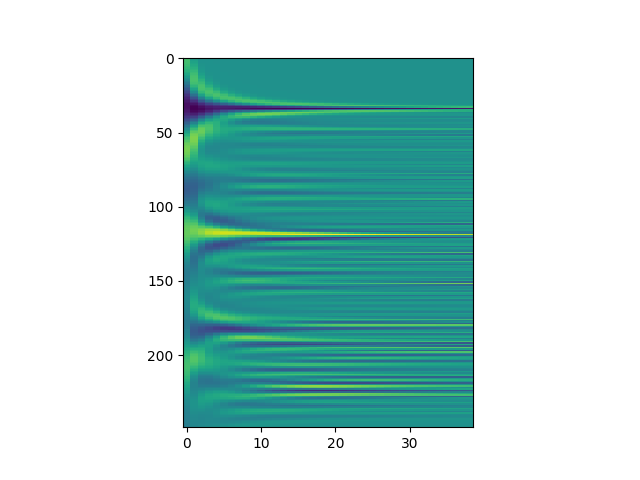

In [4]:
img = build_png(logarray, aspect_ratio=.2)
Image(img)

In [5]:
blendarray = rgb_log(path+logfile, frequencies)
Image(build_synth(blendarray))

Header section Parameter regexp=~P was not found.
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:81: RuntimeWarning: invalid value encountered in sqrt
  c_1 = c_1**f_power
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:82: RuntimeWarning: invalid value encountered in greater_equal
  c_1 = np.where(c_1 >= clipping, 1.0, c_1/clipping)
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:85: RuntimeWarning: invalid value encountered in sqrt
  c_2 = c_2**f_power
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:86: RuntimeWarning: invalid value encountered in greater_equal
  c_2 = np.where(c_2 >= clipping, 1.0, c_2/clipping)
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:89: RuntimeWarning: invalid value encountered in sqrt
  c_3 = c_3**f_power
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spe

In [7]:
Image(build_synth(blendarray))

NameError: name 'np' is not defined

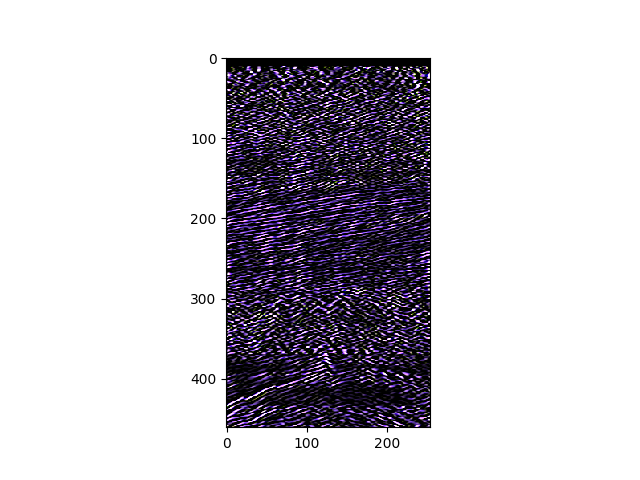

In [11]:
Image(linepng)

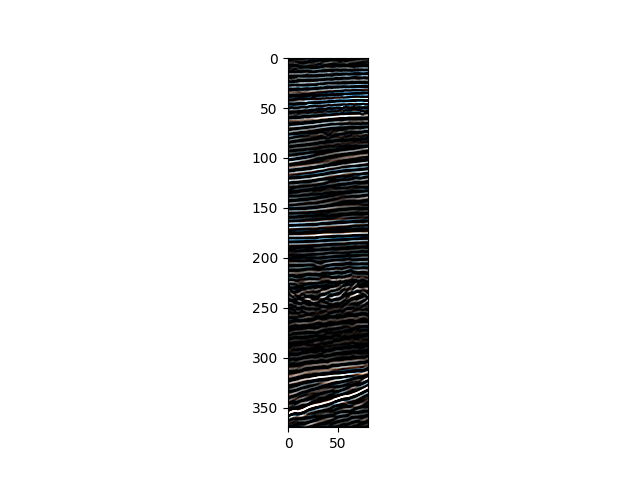

In [7]:
# F03 well inline 319 xline 460
# 250 - 502
# 320 - 560
def freq_to_index((frequencies)):
    indices = np.copy(frequencies)
    for i, f in enumerate(frequencies):
        indices[i] = np.floor((f[i]-3)/2)
    return indices
    
Image(seismic_blend_png('x',50,(20,25,29)))

In [15]:
# F03 well inline 319 xline 460
# 250 - 502
# 320 - 560
import numpy as np
def freq_to_index(frequencies):
    indices = np.copy(frequencies)
    for i, f in enumerate(frequencies):
        indices[i] = (f-3)/2
    return indices


In [16]:
freq_to_index((20,25,30))

array([ 8, 11, 13])

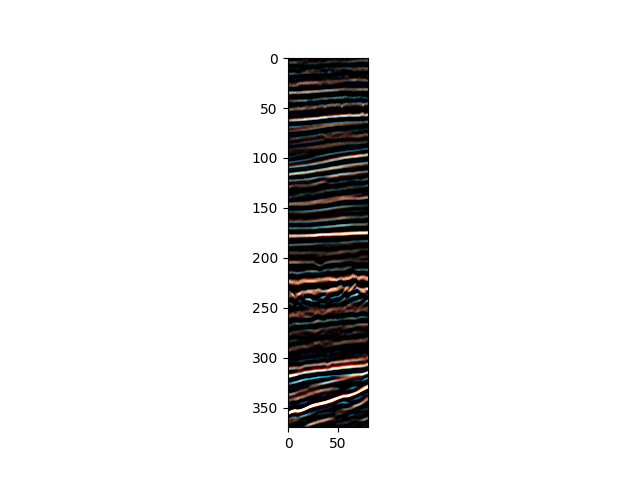

In [19]:
Image(seismic_blend_png('x',50,freq_to_index((20,25,30))))

Header section Parameter regexp=~P was not found.
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:81: RuntimeWarning: invalid value encountered in sqrt
  c_1 = c_1**f_power
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:82: RuntimeWarning: invalid value encountered in greater_equal
  c_1 = np.where(c_1 >= clipping, 1.0, c_1/clipping)
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:85: RuntimeWarning: invalid value encountered in sqrt
  c_2 = c_2**f_power
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:86: RuntimeWarning: invalid value encountered in greater_equal
  c_2 = np.where(c_2 >= clipping, 1.0, c_2/clipping)
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spec.py:89: RuntimeWarning: invalid value encountered in sqrt
  c_3 = c_3**f_power
/home/gijsbertbas/Projects/SpecDec/rgb-explorers-backend/processing/las_to_spe

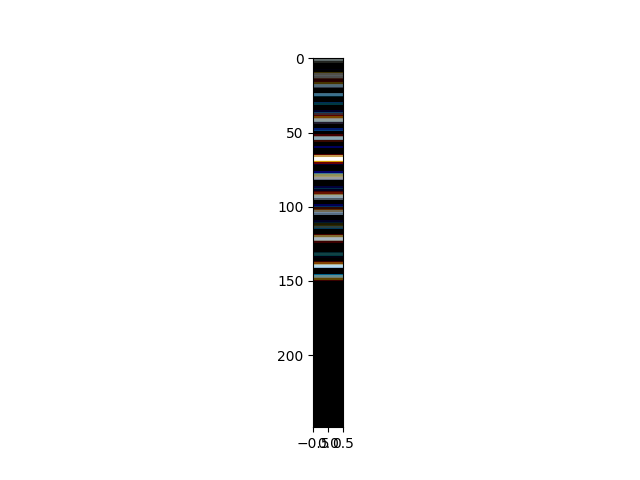

In [22]:
f2log = 'F02-01_F02-01_Set.las'
blendarray = rgb_log(path+f2log,(20,25,30))
Image(build_png(blendarray,aspect_ratio=.05))